In [36]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

project_root = Path().resolve().parents[0]
sys.path.append(str(project_root))

from src.ingest import ingest
from src.clean import clean, drop_non_GPA_courses
import src.visualize as vs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
path = Path(project_root) / "data" / "Transcript.csv"

df_raw = ingest(path)
df = clean(df_raw)
df_filtered = drop_non_GPA_courses(df)

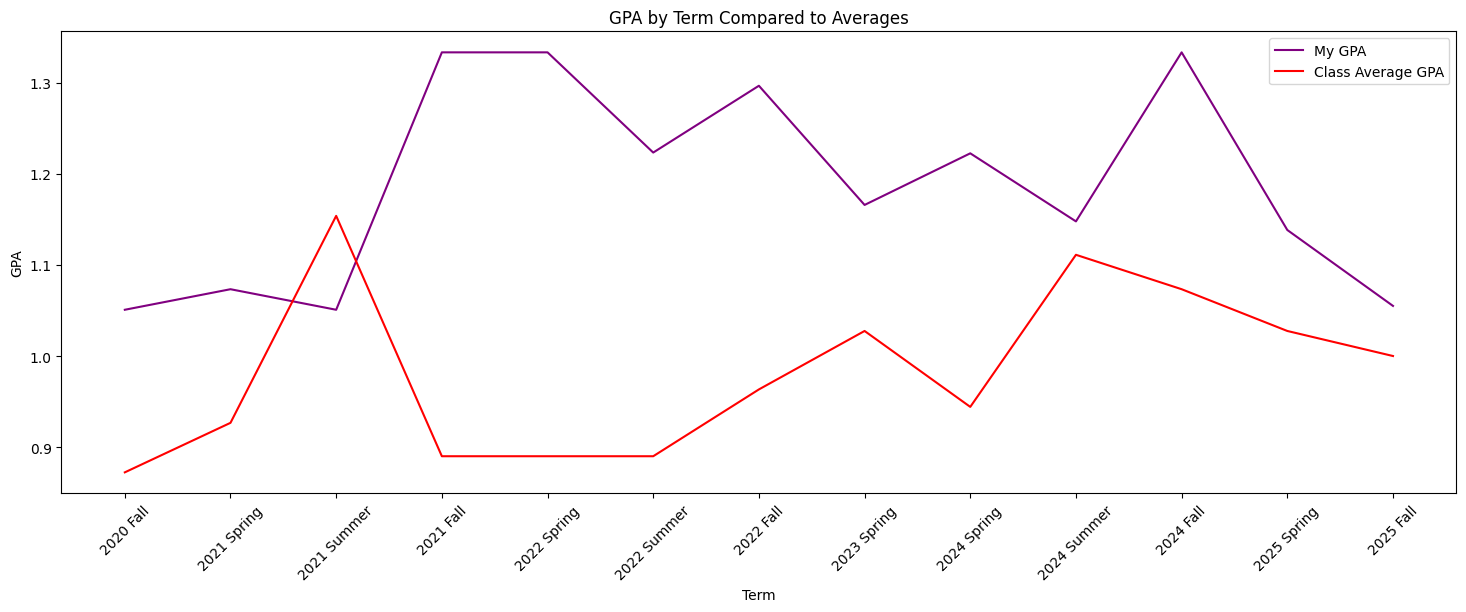

In [38]:
vs.plot_GPA_by_term(df_filtered)